In [ ]:
#---
#output-file: sample_size_effect_evaluation
#---

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#|hide
from nbdev import show_doc, nbdev_export

# Sample size effect on evaluation metrics

> What is the optimal sample size to compare experiments?

The code and the data used in this end-to-end tutorial are available and can be reproduced in a Jupyter Notebook.

## Queries to document corpus ratio

In [ ]:
ratio_devquery_corpus = 55578/8841823
ratio_devquery_corpus

0.006285807802305023

In [ ]:
from learntorank.passage import create_basic_search_package
from learntorank.evaluation import (
    MatchRatio,
    Recall, 
    ReciprocalRank, 
    NormalizedDiscountedCumulativeGain
)
from learntorank.query import QueryModel, OR, WeakAnd, Ranking

corpus_size = [10000, 100000, 1000000]
app_package = create_basic_search_package()
query_models = [
    QueryModel(
        name="bm25", 
        match_phase=OR(), 
        ranking=Ranking(name="bm25")
    ),
    QueryModel(
        name="native_rank", 
        match_phase=OR(), 
        ranking=Ranking(name="native_rank")
    ),
    QueryModel(
        name="weakand_10_bm25", 
        match_phase=WeakAnd(hits=10), 
        ranking=Ranking(name="bm25")
    ),
    QueryModel(
        name="weakand_100_bm25", 
        match_phase=WeakAnd(hits=100), 
        ranking=Ranking(name="bm25")
    ),
    QueryModel(
        name="weakand_1000_bm25", 
        match_phase=WeakAnd(hits=1000), 
        ranking=Ranking(name="bm25")
    )    
]
metrics = [
    MatchRatio(),
    Recall(at=100), 
    ReciprocalRank(at=10), 
    NormalizedDiscountedCumulativeGain(at=10)
]
output_file_path = "data/passage_bm25_weak_and3.csv"

In [ ]:
from learntorank.passage import evaluate_query_models

estimates = evaluate_query_models(
    app_package=app_package,
    query_models=query_models,
    metrics=metrics,
    corpus_size=corpus_size,
    output_file_path=output_file_path, 
)

*****
Deploy Vespa application:
*****
Waiting for configuration server, 0/300 seconds...
Waiting for configuration server, 5/300 seconds...
Waiting for configuration server, 10/300 seconds...
Waiting for application status, 0/300 seconds...
Waiting for application status, 5/300 seconds...
Waiting for application status, 10/300 seconds...
Waiting for application status, 15/300 seconds...
Waiting for application status, 20/300 seconds...
Waiting for application status, 25/300 seconds...
Waiting for application status, 30/300 seconds...
Finished deployment.
*****
Corpus size:10000
*****
*****
Generate sample data:
*****
Number of documents: 9998
Number of train queries: 62
Number of train relevance judgments: 62
Number of dev queries: 62
Number of dev relevance judgments: 62
*****
Feed sample data to Vespa app:
*****
Successful documents fed: 9998/9998.
Batch progress: 1/1.
*****
Evaluate query models
*****
*****
Delete all documents
*****
*****
Corpus size:100000
*****
*****
Generate sam

In [ ]:
import pandas as pd
import numpy as np

estimates = pd.read_csv("data/passage_bm25_weak_and3.csv")

In [ ]:
estimates.head()

,metric,model,low,median,high,corpus_size,number_queries
0,match_ratio,bm25,0.502734,0.579281,0.654747,10000,62
1,match_ratio,native_rank,0.497044,0.578647,0.654361,10000,62
2,match_ratio,weakand_1000_bm25,0.343653,0.388221,0.430810,10000,62
3,match_ratio,weakand_100_bm25,0.080096,0.095861,0.121602,10000,62
4,match_ratio,weakand_10_bm25,0.013969,0.025868,0.048539,10000,62


In [ ]:
estimates[["corpus_size", "number_queries"]] = estimates[["corpus_size", "number_queries"]].apply(pd.to_numeric)

ValueError: Unable to parse string "corpus_size" at position 20

In [ ]:
print(estimates[estimates.corpus_size.apply(lambda x: isinstance(x, str))])

                metric              model                   low  \
0          match_ratio               bm25   0.48200829682065444   
1          match_ratio        native_rank    0.4811838980699366   
2          match_ratio  weakand_1000_bm25    0.3375019358710451   
3          match_ratio   weakand_100_bm25   0.08070412469590693   
4          match_ratio    weakand_10_bm25  0.014453979505578533   
..                 ...                ...                   ...   
57  reciprocal_rank_10               bm25   0.39848236699877504   
58  reciprocal_rank_10        native_rank    0.2513614457450973   
59  reciprocal_rank_10  weakand_1000_bm25    0.3980206462855628   
60  reciprocal_rank_10   weakand_100_bm25    0.3982187401346113   
61  reciprocal_rank_10    weakand_10_bm25   0.39756556774128365   

                  median                  high corpus_size number_queries  
0     0.5589319476798584    0.6312897256870729       10000             62  
1     0.5619648123173022    0.6357404142118

In [ ]:
print(estimates[pd.to_numeric(estimates.corpus_size, errors='coerce').isnull()])

    metric  model  low  median  high  corpus_size  number_queries
20  metric  model  low  median  high  corpus_size  number_queries
41  metric  model  low  median  high  corpus_size  number_queries


In [ ]:
estimates.iloc[0]

metric                    match_ratio
model                            bm25
low               0.48200829682065444
median             0.5589319476798584
high               0.6312897256870729
corpus_size                     10000
number_queries                     62
Name: 0, dtype: object

In [ ]:
estimates.dtypes

metric            object
model             object
low               object
median            object
high              object
corpus_size       object
number_queries    object
dtype: object

In [ ]:
bm25_vs_native_rank = estimates.loc[estimates.model.isin(["bm25", "native_rank"])]

In [ ]:
bm25_vs_native_rank.describe()

,metric,model,low,median,high,corpus_size,number_queries
count,24,24,24,24,24,24,24
unique,4,2,24,24,24,3,3
top,match_ratio,bm25,0.5731474924017061,0.6560416922094094,0.7252506953003504,10000,62
freq,6,12,1,1,1,8,8


In [ ]:
from plotnine import *

def plot_metrics(estimates):
    return (ggplot(estimates, aes(colour = "model")) + 
            scale_x_log10(breaks=list(estimates.corpus_size.unique()), labels=list(estimates.corpus_size.unique())) + 
            theme(
                panel_grid_minor=element_blank(),
                subplots_adjust={'wspace': 0.15},
                legend_position = 'top'
            ) +
            geom_point(aes(x = "corpus_size", y = "median")) + 
            geom_line(aes(x = "corpus_size", y = "median")) + 
            geom_errorbar(aes(x="corpus_size", ymin="low",ymax="high")) + 
            facet_wrap("metric", scales="free_y") + labs(y="Metric value")
           )

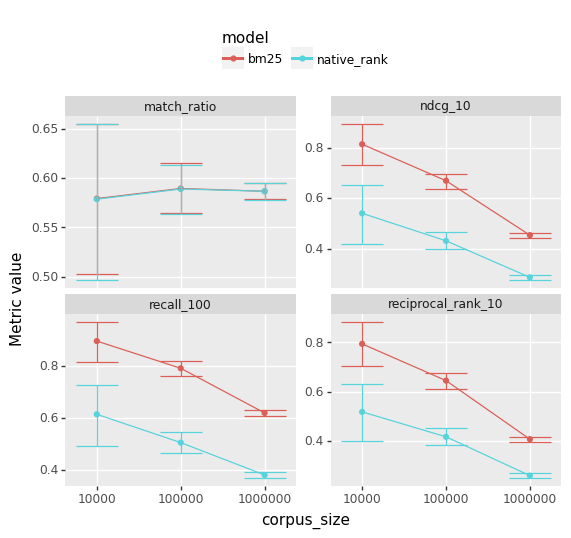

In [ ]:
print(plot_metrics(bm25_vs_native_rank))

In [ ]:
weak_and_estimates = estimates.loc[~estimates.model.isin(["native_rank"])]

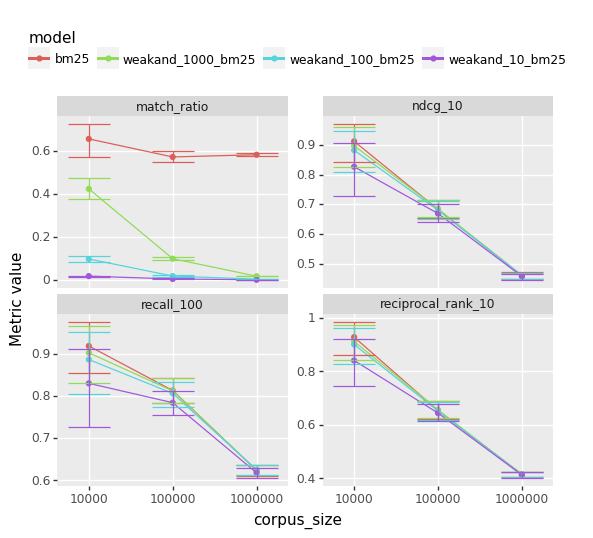

In [ ]:
print(plot_metrics(weak_and_estimates))

In [ ]:
weakand_1000000_estimates = weak_and_estimates.loc[weak_and_estimates.corpus_size == 1000000]

/Users/tmartins/.local/share/virtualenvs/learntorank-ALIDm6Gx/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


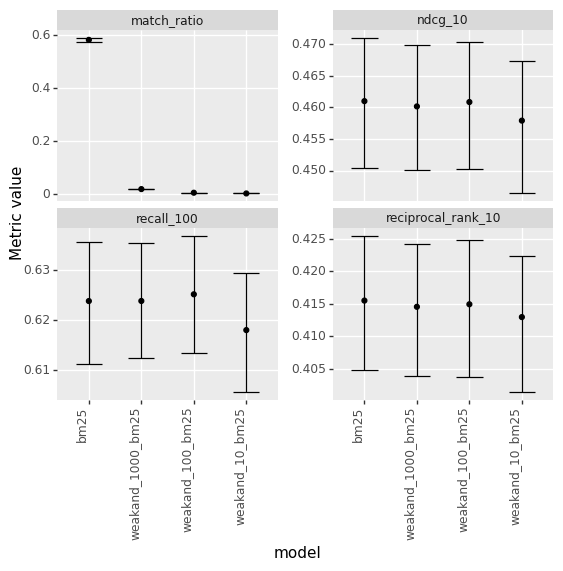

<ggplot: (315219194)>

In [ ]:
(ggplot(weakand_1000000_estimates) + 
 #scale_x_log10(breaks=list(estimates.corpus_size.unique()), labels=list(estimates.corpus_size.unique())) + 
 theme(
     panel_grid_minor=element_blank(),
     axis_text_x=element_text(rotation=90, hjust=1),
    subplots_adjust={'wspace': 0.25},
    legend_position = 'top'
) +
geom_point(aes(x = "model", y = "median")) + 
geom_line(aes(x = "model", y = "median")) + 
geom_errorbar(aes(x="model", ymin="low",ymax="high")) + 
facet_wrap("metric", scales="free_y") + labs(y="Metric value")
)

## TODO

* Eu vou usar OR como match phase e dps faco uma analise com hits do weakAND

* Incluir o timing como comparar OR e weakAnd

## Cleanup the environment

In [ ]:
vespa_docker.container.stop(timeout=600)
vespa_docker.container.remove()

In [ ]:
#|hide
nbdev_export()